In [190]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import xlrd

In [191]:
#Linear Regression
DATA_FILE  =   "data/slr05.xls"

In [196]:
book=xlrd.open_workbook ( DATA_FILE, encoding_override = "utf-8")
sheet=book.sheet_by_index(0)
data=np.asarray([sheet.row_values(i) for i in np.arange(1,sheet.nrows)])
n_samples=sheet.nrows-1

In [197]:
Xs=data[:,0]
Ys=data[:,1]
nx=Xs.shape[0]
ny=Ys.shape[0]
Xs-=np.mean(Xs,axis=0)
Xs/=np.std(Xs,axis=0)


In [240]:
g=tf.Graph()
with g.as_default():
    X=tf.placeholder(tf.float32,[nx],name="fires")
    Y=tf.placeholder(tf.float32,[ny],name="theft")
    W1=tf.Variable(0,dtype=tf.float32,name="weight1")
    W2=tf.Variable(0,dtype=tf.float32,name="weight2")
    W3=tf.Variable(0,dtype=tf.float32,name="weight3")
    W4=tf.Variable(0,dtype=tf.float32,name="weight4")
    W5=tf.Variable(0,dtype=tf.float32,name="weight5")
    b=tf.Variable(0,dtype=tf.float32,name="bias")
    predict=X*X*X*X*X*W5+X*X*X*X*W4+X*X*X*W3+X*X*W2+X*W1+b
    loss_v=tf.square(predict-Y)
    loss=tf.reduce_sum(loss_v,axis=0)/n_samples
    optimizer=tf.train.AdamOptimizer(0.01,
0.9,0.999,1e-08).minimize(loss)
    init=tf.global_variables_initializer()
    

In [241]:
sess=tf.Session(graph=g)
sess.run(init)
for i in range(0,10000):
    sess.run(optimizer,{X:Xs,Y:Ys})
v=sess.run(loss,{X:Xs,Y:Ys})




In [242]:
[w1,w2,w3,w4,w5,B]=sess.run([W1,W2,W3,W4,W5,b])

In [243]:
[w1,w2,w3,w4,w5,B]

[-3.8438416, -18.95192, 7.8262005, -0.058671109, 0.48486447, 39.344971]

linear regression 分类器：epoch=1000, rate=0.001

In [246]:
v

120.40022

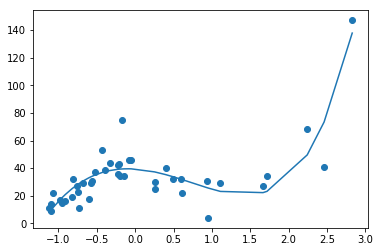

In [247]:
f1=plt.scatter(Xs,Ys)
x=sorted(Xs)
x=np.array(x)
y=x*x*x*x*x*w5+x*x*x*x*w4+x*x*x*w3+x*x*w2+x*w1+B
plt.plot(x,y)
plt.show()

In [248]:
sess.close()

In [326]:
#SVM
from tensorflow.examples.tutorials.mnist import input_data

In [432]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [514]:
nx=150
n_batch=(int)(mnist.train.num_examples/nx)

In [515]:
g2=tf.Graph()
with g2.as_default():
    X=tf.placeholder(tf.float32,[nx,784+1],name="images")
    Y=tf.placeholder(tf.float32,[nx,10],name="labels")
    W=tf.Variable(tf.random_normal([784+1,10],0.01),dtype=tf.float32, name="weights")
    logistic=tf.matmul(X,W)
    SoftMaxLoss_vector=tf.nn.softmax_cross_entropy_with_logits(logits=logistic,labels=Y)
    SoftMaxLoss=tf.reduce_sum(SoftMaxLoss_vector)
    optimizer=tf.train.AdamOptimizer(0.1,0.9,0.999,1e-08).minimize(SoftMaxLoss)
    init=tf.global_variables_initializer()


    

In [516]:
sess2=tf.Session(graph=g2)
sess2.run(init)
for i in range(10):
    for j in range(n_batch):
        Xs,Ys=mnist.train.next_batch(nx)
        Xs=np.hstack((np.ones([nx,1]),Xs))
        sess2.run(optimizer,{X:Xs,Y:Ys})
        

In [526]:
w=sess2.run(W)

RuntimeError: Attempted to use a closed Session.

In [528]:
w

array([[-5.9474659 ,  0.9650467 ,  2.43924403, ...,  3.93442607,
        -4.82722425, -1.19306636],
       [-1.6220206 , -0.17740269, -1.8018024 , ..., -0.83978087,
        -0.97892761, -0.52451879],
       [-0.35620391, -0.94082367, -0.35172871, ..., -1.19318724,
        -1.48260927,  1.81591737],
       ..., 
       [ 0.80019641, -1.09757209, -1.63992655, ...,  0.89611655,
         0.71544248,  0.23069029],
       [ 0.28098869, -0.9430142 ,  1.91589701, ...,  1.40517509,
        -0.71132708, -0.23983805],
       [-0.92900068, -0.91031742, -0.21673134, ...,  1.49601936,
         1.74725783, -0.75696158]], dtype=float32)

In [519]:
sess2.close()

In [524]:
g3=tf.Graph()
with g3.as_default():
    Xte=tf.placeholder(tf.float32,[10000,784+1],name="test_images")
    Yte=tf.placeholder(tf.float32,[10000,10],name="test_labels")
    Wtr=tf.placeholder(tf.float32,[785,10],name="trained_weights")
    logits=tf.matmul(Xte,Wtr)
    prob=tf.nn.softmax(logits)
    pred=tf.argmax(prob,1)
    labelte=tf.argmax(Yte,1)
    compare=tf.equal(pred,labelte)
    accuracy=tf.reduce_mean(tf.cast(compare,tf.float32))

In [521]:
sess3=tf.Session(graph=g3)
print(sess3)

In [522]:
xte=mnist.test.images
yte=mnist.test.labels
xte=np.hstack((np.ones([10000,1]),xte))
wtr=w
a=sess3.run(accuracy,{Xte:xte,Yte:yte,Wtr:wtr})

In [523]:
print(a)

0.9028


列向量形态:
X[N,k+1],Y[N,m],W[m,k+1]
P[m,N]=(W*X.T)
loss=-trace(ln(Y*P))

def SVMloss(w,Xtr,Ytr,lamda):
    _w=w[:,1:]
    s=0.5*lamda*np.trace((_w.T).dot(_w))
    z=w.dot(Xtr.T)
    z=np.maximum(0,z+delta-z[Ytr,np.arange(0,z.shape[1])])
    z[Ytr,np.arange(0,z.shape[1])]=0
    s+=z.sum()/Xtr.shape[0]
    return s